In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 1. Download and Visualize the Data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist 
# Train Test split
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# The 10 image categories
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Scale the pixel values to [0, 1] and reshape
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)

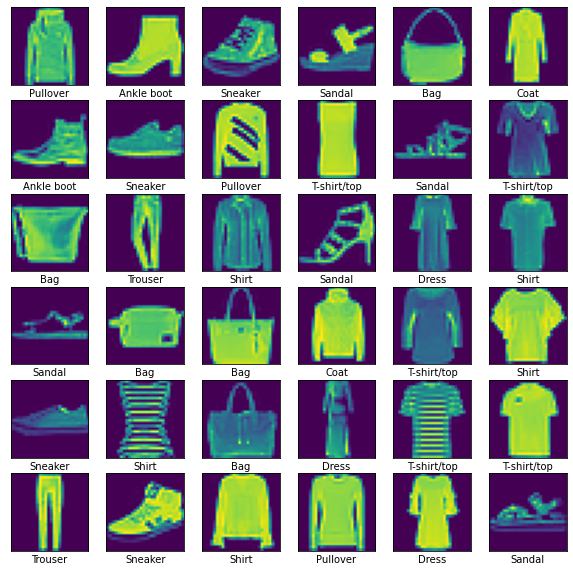

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]))
    plt.xlabel(categories[train_labels[image_ind]])

# 2. Build and train a convolutional neural network

In [5]:
def build_cnn_model():
    cnn_model = keras.Sequential([
        # 1st convolutional layer with 24 filters
        keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # 1st max pooling layer
        keras.layers.MaxPool2D(pool_size=(2,2)),
        # 2nd convolutional layer with 24 filters
        keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # 2nd max pooling layer
        keras.layers.MaxPool2D(pool_size=(2,2)),
        # fully connected networks
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation=tf.nn.relu),
        # output should be 10 classification probabilities
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    return cnn_model

In [6]:
cnn_model = build_cnn_model()
# Hyperparameters
cnn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
BATCH_SIZE = 32
EPOCHS = 10

In [7]:
# Model fitting
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.3247 - accuracy: 0.5286
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5677 - accuracy: 0.7863
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4749 - accuracy: 0.8259
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4324 - accuracy: 0.8442
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4090 - accuracy: 0.8511
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3871 - accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.8671
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3506 - accuracy: 0.8718
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8750
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.324

In [8]:
train_loss, train_acc = cnn_model.evaluate(train_images, train_labels)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Train accuracy:', train_acc, 'Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8755
Train accuracy: 0.8876000046730042 Test accuracy: 0.8755000233650208


# 3. Verify Predictions

In [9]:
predictions = cnn_model.predict(test_images)

Pick a number: 666


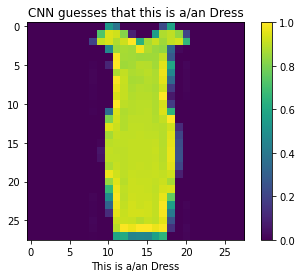

In [10]:
# Pick a number to display
image_ind = int(input("Pick a number: "))
predicted_category = np.argmax(predictions[image_ind])

plt.figure()
plt.imshow(np.squeeze(test_images[image_ind]))
plt.xlabel("This is a/an " + categories[test_labels[image_ind]])
plt.title("CNN guesses that this is a/an " + categories[predicted_category])
plt.colorbar()
plt.show()